# IMDB word classification

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Loading imdb_reviews/subwords8k

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import tensorflow_datasets as tfds
imdb_subwords, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

In [4]:
train, test = imdb_subwords['train'], imdb_subwords['test']

In [5]:
for t in train.take(2):
    print(t)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [6]:
tokenizer = info.features['text'].encoder

In [7]:
for t in train.take(2):
    print(tokenizer.decode(t[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [12]:
print(f'Vocabulary size is {tokenizer.vocab_size}')

Vocabulary size is 8185


In [31]:
for item in tokenizer.subwords:
    print(f'{item:<10}', end='')

the_      ,         .         a_        and_      of_       to_       s_        is_       br        in_       I_        that_     this_     it_        /><       />       was_      The_      as_       t_        with_     for_      .<        on_       but_      movie_     (        are_      his_      have_     film_     not_      ing_      be_       ed_       you_       "        it        d_        an_       he_       by_       at_       one_      who_      y_        from_     e_        or_       all_      like_     they_     "         so_       just_     has_      )         her_      about_    out_      This_     some_     ly_       movie     film      very_     more_     It_       would_    what_     when_     which_    good_     if_       up_       only_     even_     their_    had_      really_   my_       can_      no_       were_     see_      she_      ?         than_     !         there_    get_      been_     into_      -        will_     much_     story_    because_  ing       

## Train

In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Get the train and test splits
train_data, test_data = imdb_subwords['train'], imdb_subwords['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [10]:
# Define dimensionality of the embedding
embedding_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [33]:
num_epochs = 10

# Set the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Start training
with tf.device('GPU:0'):
    history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 59s 149ms/step - loss: 0.6511 - accuracy: 0.6838 - val_loss: 0.5778 - val_accuracy: 0.7756
Epoch 2/10
391/391 [==============================] - 41s 105ms/step - loss: 0.4689 - accuracy: 0.8312 - val_loss: 0.4078 - val_accuracy: 0.8532
Epoch 3/10
391/391 [==============================] - 28s 73ms/step - loss: 0.3357 - accuracy: 0.8824 - val_loss: 0.3553 - val_accuracy: 0.8540
Epoch 4/10
391/391 [==============================] - 20s 50ms/step - loss: 0.2781 - accuracy: 0.8995 - val_loss: 0.3302 - val_accuracy: 0.8668
Epoch 5/10
391/391 [==============================] - 17s 43ms/step - loss: 0.2457 - accuracy: 0.9096 - val_loss: 0.3098 - val_accuracy: 0.8774
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2209 - accuracy: 0.9206 - val_loss: 0.3098 - val_accuracy: 0.8767
Epoch 7/10
391/391 [==============================] - 9s 22ms/step - loss: 0.2037 - accuracy: 0.9260 - val_loss: 0.3102 - val_accuracy

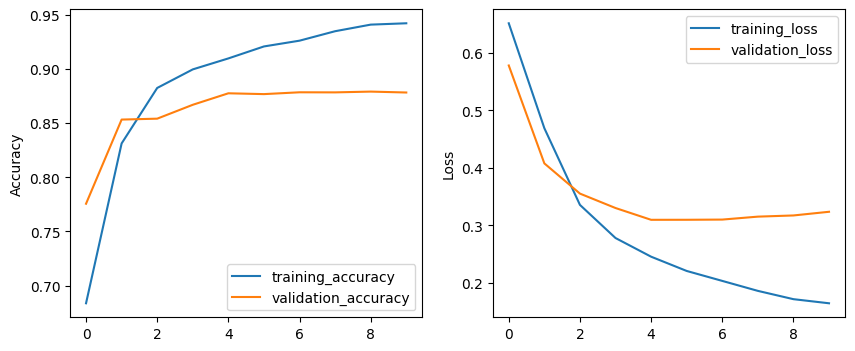

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(history.history['accuracy'], label='training_accuracy');
ax[0].plot(history.history['val_accuracy'], label='validation_accuracy');

ax[1].plot(history.history['loss'], label='training_loss')
ax[1].plot(history.history['val_loss'], label='validation_loss')

ax[0].set_ylabel('Accuracy');
ax[1].set_ylabel('Loss');

ax[0].legend();
ax[1].legend();